In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-csv/data.csv


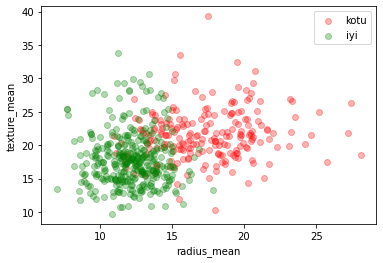

In [2]:
data=pd.read_csv("../input/data-csv/data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha=0.3)#isteğe göre alpha =0.3 saydamlik verilebilir
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha=0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()
data.diagnosis=[1 if each == "M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data=data.drop(["diagnosis"],axis=1)
x=(x_data- np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [3]:
#svm
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("print accuracy of svm algo :",svm.score(x_test,y_test))

print accuracy of svm algo : 0.9649122807017544


In [4]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("print accuracy of naive bayes algo :",nb.score(x_test,y_test))


print accuracy of naive bayes algo : 0.935672514619883
